# Analyzing Climate Talk
## DH140 Final Project by Justine Lim
### July 2024

In the complex fight against climate change, effective communication is key. Understanding how different rhetoric is used to shape public perception and inspire action can make all the difference. I want to find which types of language are most indicative of propaganda versus scientifically backed information to gauge their influence on public understanding of climate change.

From understanding the ways propaganda and scientifically backed works communicate their messages, we can learn how to better inform and engage the public. Analyzing the language used in these different types of rhetoric will help us understand the divides that influence how climate change is perceived and acted upon. My research intends to break these divisions and instead promote a more informed and unified approach to understanding environmental issues.

By not only addressing an urgent global challenge but also using the power of digital humanities to find the intricate ways in which language shapes our world, my study aims to contribute to more effective climate communication strategies for greater public awareness and action.

### My Research Question:
> In what ways have rhetorical strategies been used in written works about climate change, and what can exploratory data analysis of sentimental language reveal about the presence of propaganda versus scientifically backed information in reputable publications?

The primary motivation for pursuing this research question came from completing Assignment 05, where we learned how to use Natural Language Processing to create strong data visualizations. I wanted to apply these tools to a new dataset on a topic I feel deeply about. I believe that understanding the severity of global warming is crucial, and one of the issues is how we discuss it. The language we use often fails to convey the urgency of the situation, and I want to explore how this affects public perception and potential solutions.

All my data will be compiled from the online Climate section of [The Atlantic](https://www.theatlantic.com/), because after testing many reputable publications, I found that it has fewer restrictions on web scraping. I will use Python packages specializing in web scraping, such as Beautiful Soup and Requests, to parse HTML documents and extract links to various articles. Once I have access to these articles, I will use Pandas to organize the data into an analyzable format. For text processing, I will utilize NLTK, and for creating visualizations, I will mainly use Matplotlib.

### DATA COLLECTION:

In [1]:
import requests
from bs4 import BeautifulSoup

The first step in our analysis was to set up the web scraping process. To retrieve data from the web, I imported two libraries, `requests` to retrieve the HTML code from The Atlantic's [Climate](https://www.theatlantic.com/category/climate/) webpage and `BeautifulSoup` to parse the HTML and find links to various articles on the page.

In [2]:
response = requests.get('https://www.theatlantic.com/category/climate/')
html_string = response.text

doc = BeautifulSoup(html_string, 'html.parser')
article_list = []
    
for li in doc.select('ul li a'):
        href = li.get('href')
        if href and '/archive' in href:
            article_list.append(href)
          
for a in doc.find_all('a', href=True):
    href = a['href']
    if '/archive' in href:
        article_list.append(href)

By searching for all occurrences of anchor tags within lists and also all anchor tags on the page, I created a variable `article_list` that contains a list of links to the latest Atlantic articles on climate. To avoid irrelevant links to images and other navigation, I filtered specifically for links that contain `/archive` in their `href` attribute.

In [3]:
def getArticleDetails(article):
  response = requests.get(article)
  doc = BeautifulSoup(response.text, 'html.parser')
  
  title = doc.find('h1')
  article_title = title.get_text()
  
  article_body = doc.find_all(class_='ArticleParagraph_root__4mszW')
  article_text = ''
  
  for paragraph in article_body:
    article_text += paragraph.get_text() + '\n'
    
  return article_title, article_text

I have defined a function `getArticleDetails` to open a particular url and return its title and paragraph text in a string form without unnecessary headers or links.

In [4]:
import random

sampled_articles = random.sample(article_list, 6)

Because [The Atlantic](https://www.theatlantic.com/) has an abundance of written works, I imported Python's `random` module to take a random sample of 6 article URLs from the list to control my data analysis.

In [5]:
import pandas as pd

articleDF = pd.DataFrame(columns=['url', 'text'])

df_list = []

for article_url in sampled_articles:
  if article_url.startswith('/'):
    article_url = 'https://www.theatlantic.com' + article_url
  article_title, article_text = getArticleDetails(article_url)
    
  word_count = len(article_text.split())
  
  df_list.append(pd.DataFrame({'url': [article_url], 'title': [article_title], 'text': [article_text], 'word_count': [word_count]}))

articleDF = pd.concat(df_list, ignore_index=True)

I have now imported the `pandas` library to set up for data manipulation and analysis. I then set up a for-loop that retrieved the title and text using the `getArticleDetails` function defined earlier. I also used the `len()` tool to calculate each article's word count. To organize all the data and prevent overwriting variables with each iteration, I created a list to store individual data frames for each article's `article_url`, `article_title`, `article_text`, and `word_count`. After collecting all the data frames, I concatenated them into a single data frame to store the information for all articles in the sample.

### DATA EXPLORATION:

In [6]:
print(articleDF)

                                                 url  \
0  https://www.theatlantic.com/science/archive/20...   
1  https://www.theatlantic.com/science/archive/20...   
2  https://www.theatlantic.com/science/archive/20...   
3  https://www.theatlantic.com/science/archive/20...   
4  https://www.theatlantic.com/magazine/archive/2...   
5  https://www.theatlantic.com/technology/archive...   

                                               title  \
0            Plastic Has Changed Sea Turtles Forever   
1  Do Not Allow Even One Fruit Fly Into Your Kitc...   
2  One Huge Contradiction Is Undoing Our Best Cli...   
3            Plastic Has Changed Sea Turtles Forever   
4  The Climate Can’t Afford Another Trump Presidency   
5         Texas Is a Look Into the Future of Driving   

                                                text  word_count  
0  As recently as the 1960s, perhaps later—within...        1109  
1  Last week, as my spouse and I were settling in...        1097  
2  You’d be f

In the above code, I have printed out the main dataframe we created to summarize the data we will be using for our analysis. As we can see, there are three main columns with 6 rows for each of the 6 articles we will be comparing. The columns store its url, title, text, and total word count.

In [7]:
import matplotlib.pyplot as plt

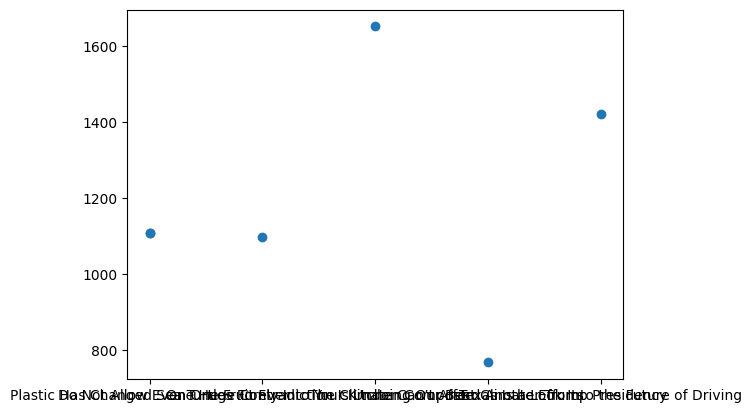

In [8]:
plt.scatter(articleDF['title'], articleDF['word_count'])

After importing the `matplotlib.pyplot` package, I was well equipped to begin creating exploratory visualizations. To make one that compared articles with their word count, I chose to do a scatterplot, but ran into a few obvious issues:

1. The titles, being too long, overlapped over one another. 
2. The points were all the same color, making it difficult to distinguish from one another. 

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Plastic Has Changed Sea Turtles Forever'),
  Text(1, 0, 'Do Not Allow Even One Fruit Fly Into Your Kitchen Compost'),
  Text(2, 0, 'One Huge Contradiction Is Undoing Our Best Climate Efforts'),
  Text(3, 0, 'The Climate Can’t Afford Another Trump Presidency'),
  Text(4, 0, 'Texas Is a Look Into the Future of Driving')])

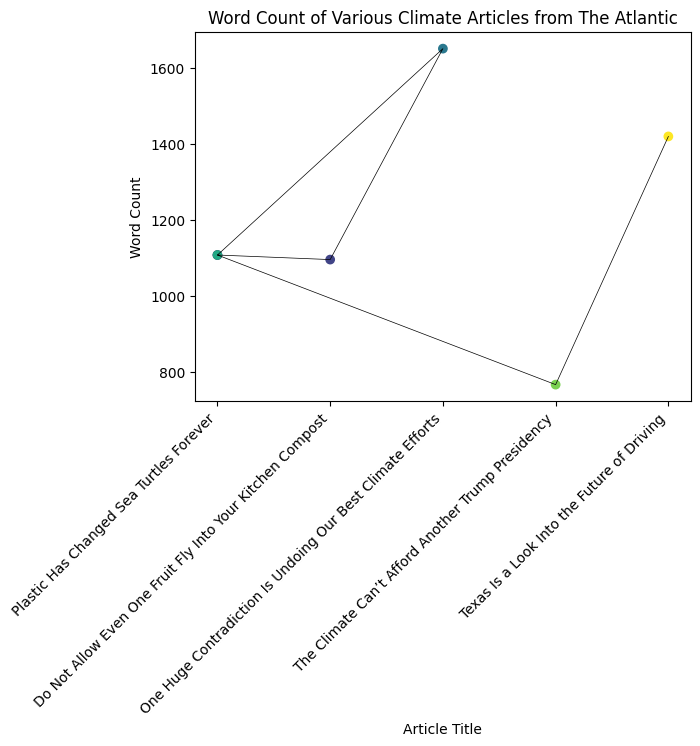

In [9]:
plt.plot(articleDF['title'], articleDF['word_count'], color='black', linewidth=0.5)
plt.scatter(articleDF['title'], articleDF['word_count'], c=range(len(articleDF)))

plt.xlabel('Article Title')
plt.ylabel('Word Count')
plt.title('Word Count of Various Climate Articles from The Atlantic')

plt.xticks(rotation=45, ha='right')

By adding a color setting within the `plt.scatter()` function, I was able to create distinctive colors per point, and by rotating the x-axis labels 45 degrees to the right, each title was able to be read by itself without any overlap. After I added a title and labels to the x-axis and y-axis, to make the visual even more clear, I overlapped the scatterplot with a lineplot to accentuate the trend.

However, even with these adjustments, I was still not satisfied with the visualization, and felt that there was a better plot I could choose.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Plastic Has Changed Sea Turtles Forever'),
  Text(1, 0, 'Do Not Allow Even One Fruit Fly Into Your Kitchen Compost'),
  Text(2, 0, 'One Huge Contradiction Is Undoing Our Best Climate Efforts'),
  Text(3, 0, 'The Climate Can’t Afford Another Trump Presidency'),
  Text(4, 0, 'Texas Is a Look Into the Future of Driving')])

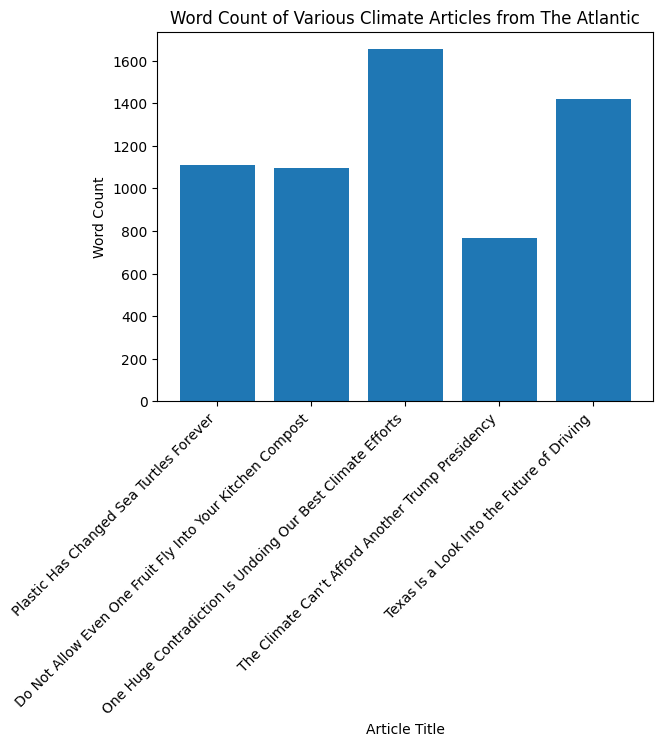

In [10]:
plt.bar(articleDF['title'], articleDF['word_count'])

plt.xlabel('Article Title')
plt.ylabel('Word Count')
plt.title('Word Count of Various Climate Articles from The Atlantic')

plt.xticks(rotation=45, ha='right')

After using those same adjustments on a verticle bar plot, I think this visualization best shows the trend in word count in an understandable and simple way, and gives me a good foundation for the next step in my project.

### TEXT PROCESSING:

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

To begin the data analysis portion of my final project, I have imported the Natural Language Toolkit (`NLTK`) and its various modules to help with starting a more focused analysis.

In [12]:
stop_words = (stopwords.words('english'))
senti = vader.SentimentIntensityAnalyzer()

def processText(text):
  tokenized_text = word_tokenize(text)
  noStop_text = [word for word in tokenized_text if word.lower() not in stop_words]
  
  stemmed_text = [PorterStemmer().stem(word) for word in noStop_text]
  return stemmed_text

articleDF['processed'] = articleDF['text'].apply(processText)

Above, I began by creating two variables to help me with syntax in using NLTK modules. I then defined a function to process the raw text from [The Atlantic](https://www.theatlantic.com/) articles by tokenizing the string, removing stop words, and words with the same stem.

### ANALYSIS + VISUALIZATION:

In [13]:
# compares total frequency of positive and negative words
def PosNeg(text):
  pos_count = 0
  neg_count = 0

  for word in text:
    score = senti.polarity_scores(word)
    if score['compound'] > 0:
      pos_count += 1
    elif score['compound'] < 0:
      neg_count += 1

  return pos_count, neg_count

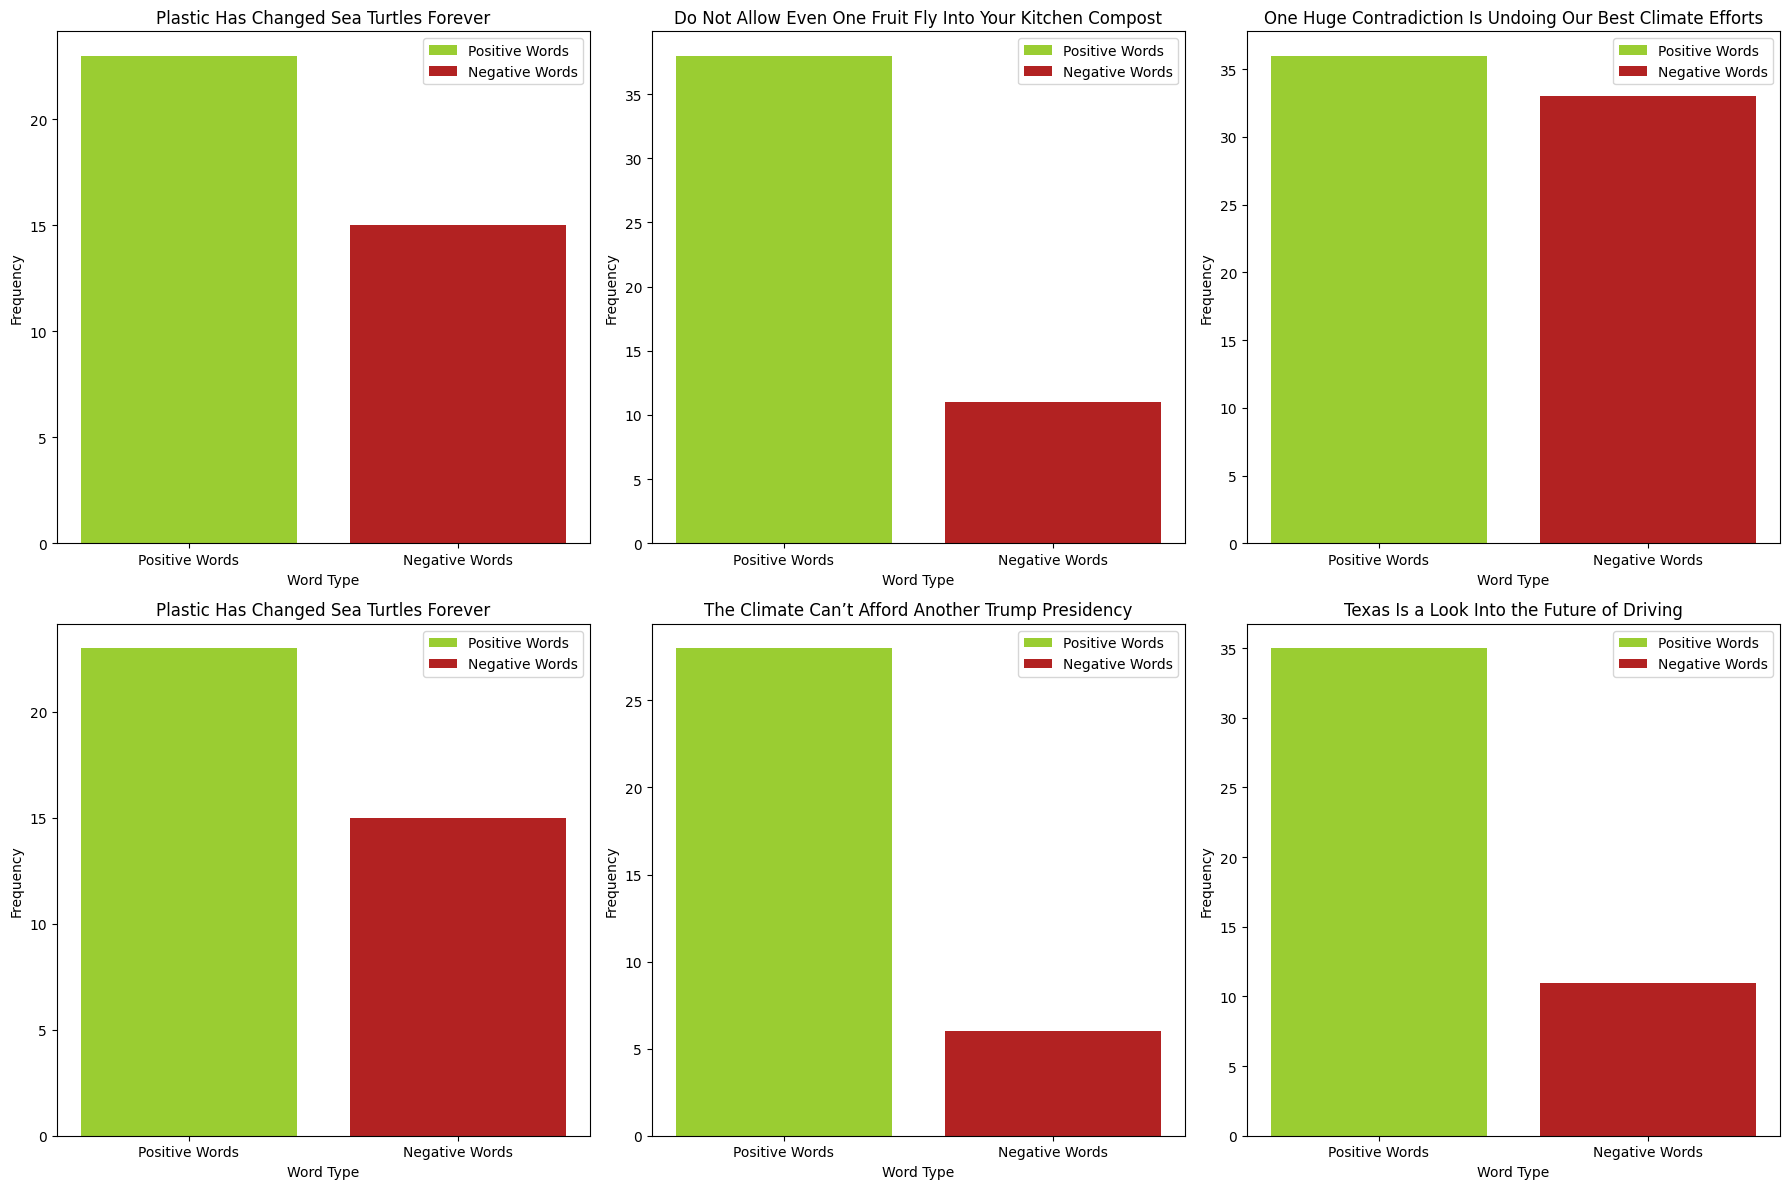

In [14]:
fig, axis = plt.subplots(2, 3, figsize=(18, 12))  # fits all plots in one page
axis = axis.flatten()

for i in range(len(articleDF)):   # for each row/article in articleDF
    row = articleDF.iloc[i]

    pos_count, neg_count = PosNeg(row['processed'])

    axis[i].bar('Positive Words', pos_count, color='yellowgreen', label='Positive Words')
    axis[i].bar('Negative Words', neg_count, color='firebrick', label='Negative Words')

    axis[i].set_title(row['title'])
    axis[i].set_xlabel('Word Type')
    axis[i].set_ylabel('Frequency')
    axis[i].legend()
    
plt.tight_layout()  # no axis overlap

The `PosNeg()` function takes in a given text and calculates the total number of positive and negative words by using the VADER sentiment analyzer to score each word, incrementing variables `pos_count` for positive scores and `neg_count` for negative scores. The function returns the counts of positive and negative words, visualizing information into the general sentiment of the text.

In [15]:
# compares 15 most common positive and negative words
def PosNegFreq(text):
  pos_words = []
  neg_words = []
  
  for word in text:
    score = senti.polarity_scores(word)
    if score['compound'] > 0:
      pos_words.append(word)
    elif score['compound'] < 0:
      neg_words.append(word)

  pos_common = nltk.FreqDist(pos_words).most_common(15)
  neg_common = nltk.FreqDist(neg_words).most_common(15)
  
  pos = []
  pos_freq = []
  for i in pos_common:
    pos.append(i[0])
    pos_freq.append(i[1])
    
  neg = []
  neg_freq = []
  for i in neg_common:
    neg.append(i[0])
    neg_freq.append(i[1])
    
  return pos, pos_freq, neg, neg_freq

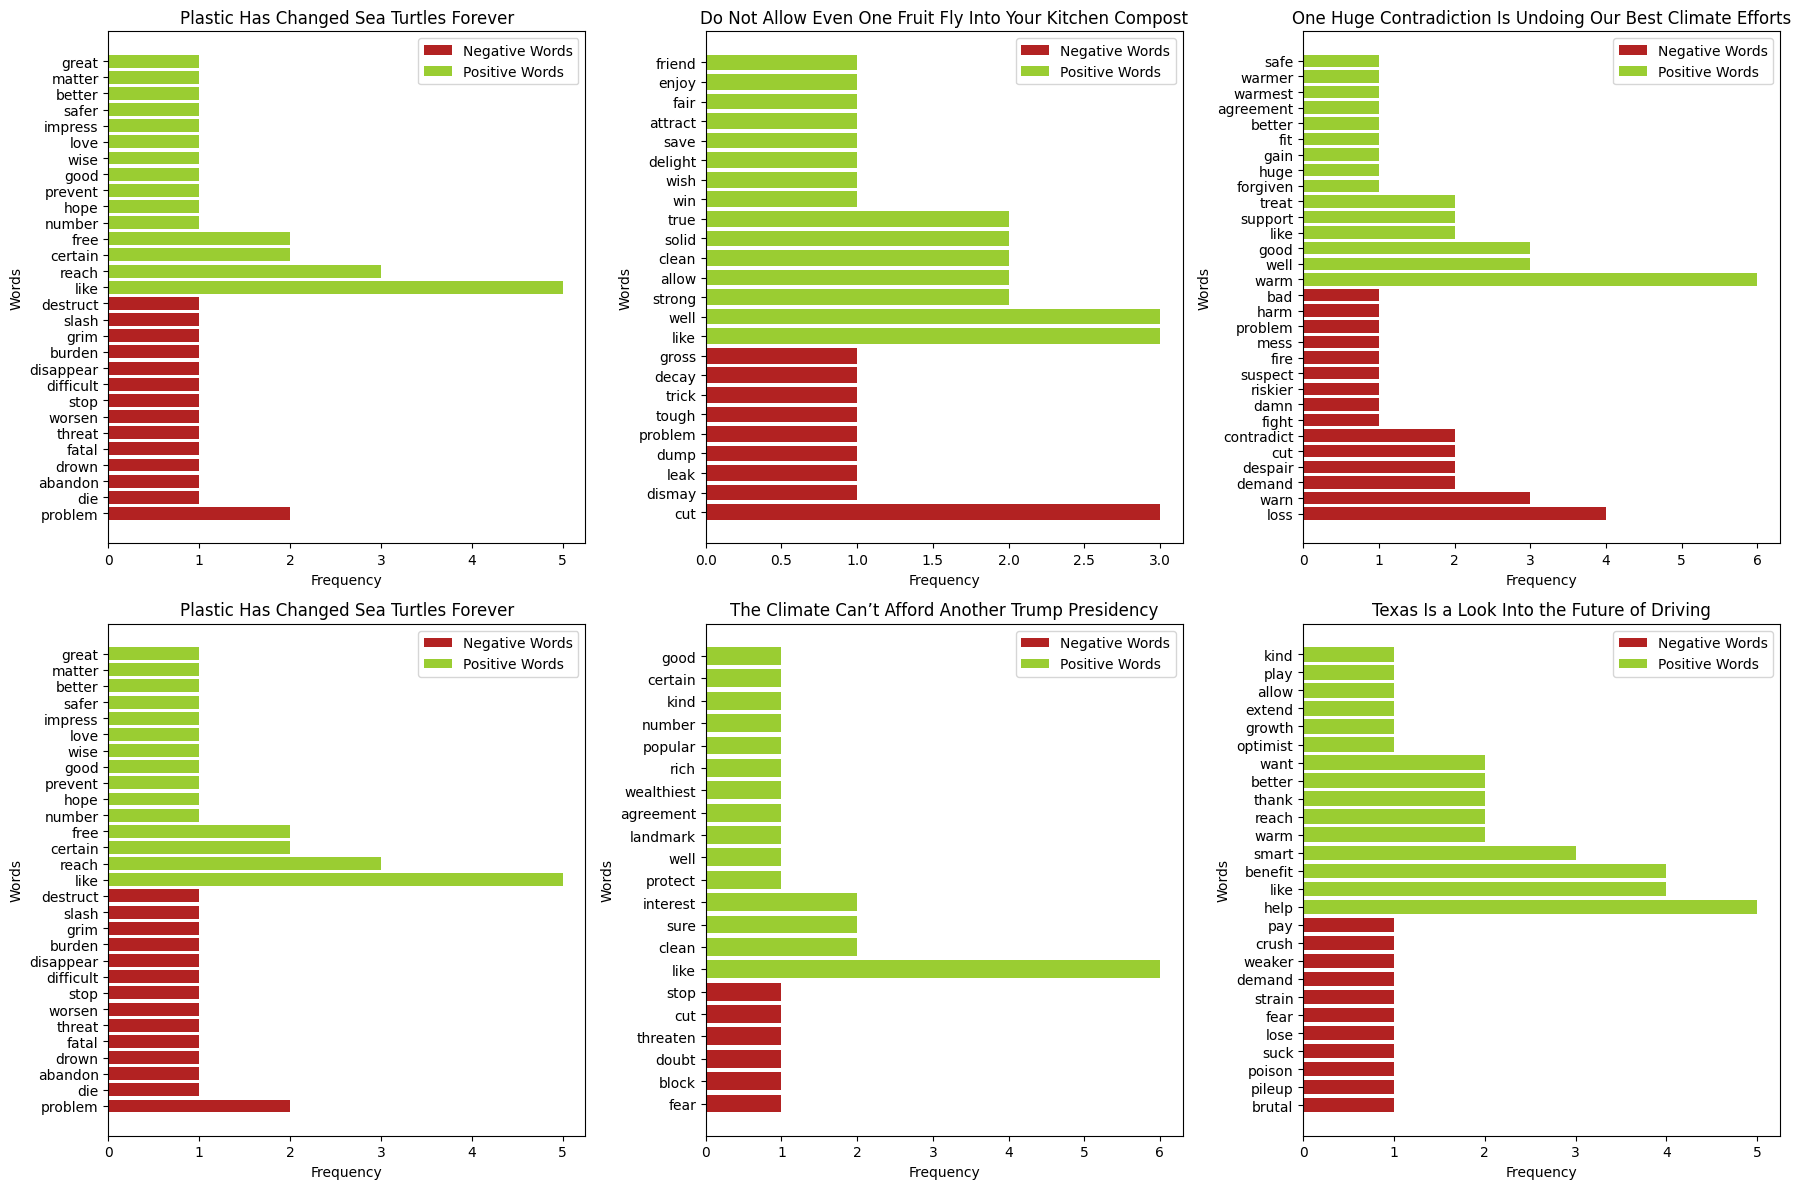

In [16]:
fig, axis = plt.subplots(2, 3, figsize=(18, 12))  # fits all plots in one page
axis = axis.flatten()

for i in range(len(articleDF)):   # for each row/article in articleDF
    row = articleDF.iloc[i]

    pos, pos_freq, neg, neg_freq = PosNegFreq(row['processed'])

    axis[i].barh(neg, neg_freq, color='firebrick', label='Negative Words')
    axis[i].barh(pos, pos_freq, color='yellowgreen', label='Positive Words')

    axis[i].set_title(row['title'])
    axis[i].set_xlabel('Frequency')
    axis[i].set_ylabel('Words')
    axis[i].legend()
    
plt.tight_layout()  # no axis overlap

The `PosNegFreq()` function identifies the 15 most common positive and negative words in a given text. It classifies words based on their sentiment scores using the VADER analyzer, and then calculates their frequencies, returning four lists: the most common positive words, their frequencies, the most common negative words, and their frequencies.

In [17]:
def RankByNeg(text):
  neg_score = []
  
  for index, row in text.iterrows():
    pos_count, neg_count = PosNeg(row['processed'])
    neg_score.append((row['title'], neg_count))
    
  for i in range(len(neg_score)):
    for j in range(i + 1, len(neg_score)):
      if neg_score[i][1] < neg_score[j][1]:
        neg_score[i], neg_score[j] = neg_score[j], neg_score[i]
  
  return neg_score

Text(0.5, 1.0, 'Negative Word Count by Article')

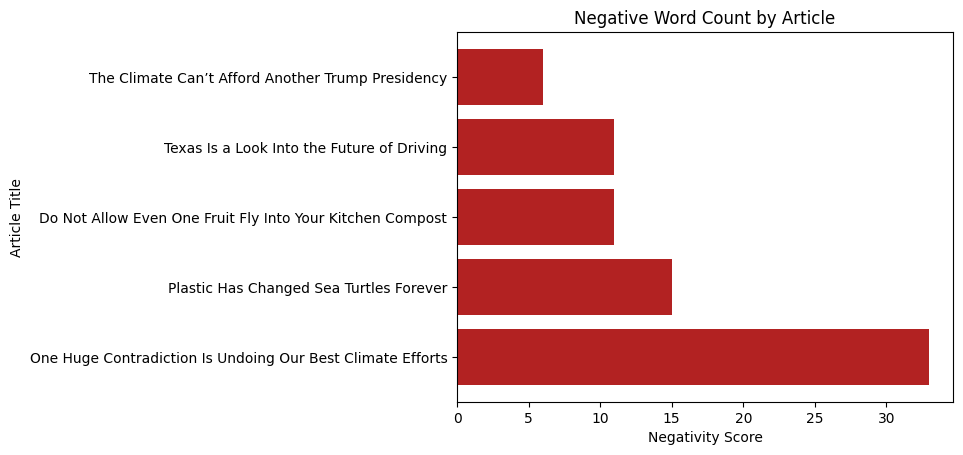

In [18]:
neg_scores = RankByNeg(articleDF)

titles = [item[0] for item in neg_scores]
scores = [item[1] for item in neg_scores]

plt.barh(titles, scores, color='firebrick')
plt.xlabel('Negativity Score')
plt.ylabel('Article Title')
plt.title('Negative Word Count by Article')

The `RankByNeg()` function calculates negativity scores (total number of negative words) for each article using the previous `PosNeg()` function and sorts the list of scores in order.

In [19]:
def RankByPos(text):
  pos_score = []
  
  for index, row in text.iterrows():
    pos_count, neg_count = PosNeg(row['processed'])
    pos_score.append((row['title'], pos_count))
    
  for i in range(len(pos_score)):
    for j in range(i + 1, len(pos_score)):
      if pos_score[i][1] < pos_score[j][1]:
        pos_score[i], pos_score[j] = pos_score[j], pos_score[i]
  
  return pos_score

Text(0.5, 1.0, 'Positive Word Count by Article')

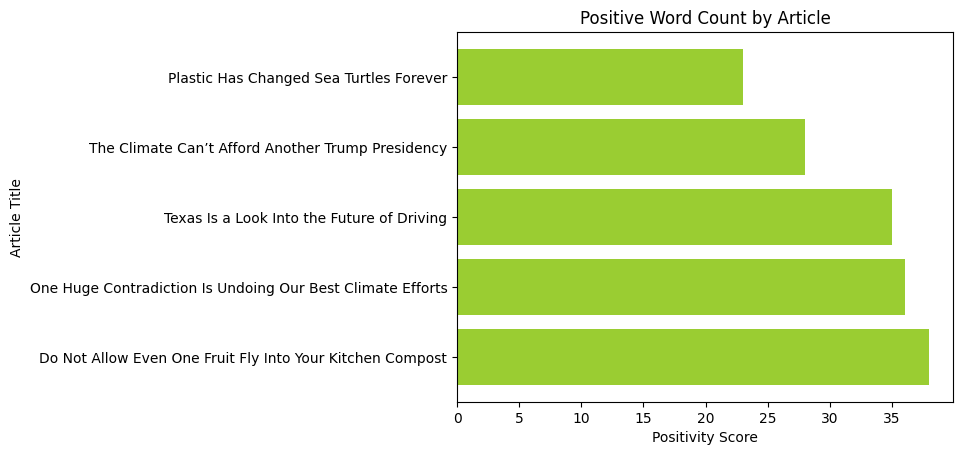

In [20]:
pos_scores = RankByPos(articleDF)

titles = [item[0] for item in pos_scores]
scores = [item[1] for item in pos_scores]

plt.barh(titles, scores, color='yellowgreen')
plt.xlabel('Positivity Score')
plt.ylabel('Article Title')
plt.title('Positive Word Count by Article')

The `RankByPos()` function calculates positivity scores (total number of positive words) for each article using the previous `PosNeg()` function and sorts the list of scores in order.

### RESULTS:

My preliminary analysis has given me valuable information on how rhetorical strategies are used in written works about climate change. By examining the frequency and sentiment of specific word choices, I have began to uncover patterns that reveal how language is used to frame climate change issues in various articles.

The visualizations generated from the data reveal a sharp divide in language use between articles that focus on raising awareness about climate change and those proposing solutions. The article [We're in an Age of Fire](https://www.theatlantic.com/science/archive/2023/08/maui-wildfire-hurricane-connection/674982/) exhibits a higher frequency of negative language, with terms such as "fire" and "problem" predominating. This suggests that these articles are more likely to emphasize the urgency and severity of climate change, potentially to provoke concern and action.

On the other hand, articles that propose solutions or discuss positive developments, such as [A Radical Idea to Break the Logic of Oil Drilling](https://www.theatlantic.com/science/archive/2023/12/cop28-fossil-fuel-nonproliferation-agreement-colombia/676306/), tend to use more positive language. Words like "warm" and "better", with higher positive scores, are more frequently used, showing a focus on hopeful narratives and potential advancements. This difference in language use is an example of a rhetorical strategy where negative language is used to show the critical nature of the problem, while positive language is used to convey optimism and the possibility for progress.

In regards to my research focus, propaganda typically relies on emotionally charged negative language, while scientific information balance both positive and negative language. With a more robust analysis involving multiple sources and a larger dataset, I could fully answer my research question and differentiate between the two.

### CONCLUSION:

This research shows the important role of how we talk about climate change. The words and phrases used in climate change articles can strongly influence how people understand and respond to the issue. When the language used shows urgency and the seriousness of the problem, it can encourage people to take action and better understand the crisis. However, if the language downplays the severity or misrepresents the facts, it can slow down efforts to address climate change. Thus, the way climate change is talked about in public can either help or hinder the efforts to deal with this global problem.

Our findings provide useful information for creating better ways to communicate about climate change, guiding media practices, and supporting efforts to encourage more action and possible policy changes.